<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/basic_plots_of_all_datasheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title


In [2]:
# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss


In [3]:
data = pd.read_excel('/content/Leads Generated.xlsx')
df = pd.DataFrame(data)
df

,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,lead_id.1,graduation_degree,graduation_percentage,work_experience,mapped,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_S3_never-been-easier,USP_2_Lead-gen-1_220124,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:3587545764833355,b.tech_cse,70.0,7,Mapped,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,--,USP_Search_APTNTSKA_250124,NaN,Google,cc0da387-682c-4530-a79a-1168487410f0,B.Tech CSE,80.0,3 Years,NaN,NaN,NaN,NaN,NaN
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,Shreya,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,NaN,Google,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,PG,50.0,1 Year,Mapped,NaN,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,--,USP_Search_APTNTSKA_250124,NaN,Google,7e0db362-ebc3-4265-9131-d69bae5eb3f5,Others,60.0,Fresher,Mapped,NaN,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,Shreya,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,NaN,Google,5f74bcc1-08a8-414d-a729-69d5071b4f53,UG,100.0,10 Years,Mapped,NaN,Invalid phone number,Ayush Dixit,GoogleAds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32764,l:1287087698649474,2023-12-29 20:15:00,#9 ( Graphic ) - Study In The US,USP Masterclass Cold [ 31st Oct ] - Higher Int...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,l:1287087698649474,"b.tech_(civil,_eee,_mech._,_etc.)",65.0,1,Mapped,Contacted,New Enquiry,Tarun Gupta,NaN
32765,l:752743646765142,2024-01-24 13:37:00,USP_Influencer_videoAd2,USP_Program_More-Volume_No Logic_India_220124,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:752743646765142,others,65.0,1,Mapped,Contacted,Never Picked up,System,Facebook
32766,l:701943358682733,2024-03-21 06:19:00,USP_RIT_1_Getpaid,USP_MS + Coop Campaign_240224,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:701943358682733,b.tech_cse,80.0,1,Mapped,Contacted,New Enquiry,Ankur chandra,Zoom Webinar
32767,ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6,2024-01-04 03:45:00,USP_Program_Linkedin_Static_C19_Dual-Course-white,US_Pathway_2_Lead_gen_3_241123,US Pathway Program final Form 110923,LinkedIn,ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6,"B.Tech (Civil, EEE, Mech. , etc.)",85.0,1,Mapped,Contacted,Not Interested,Abid Bhat,LinkedIn


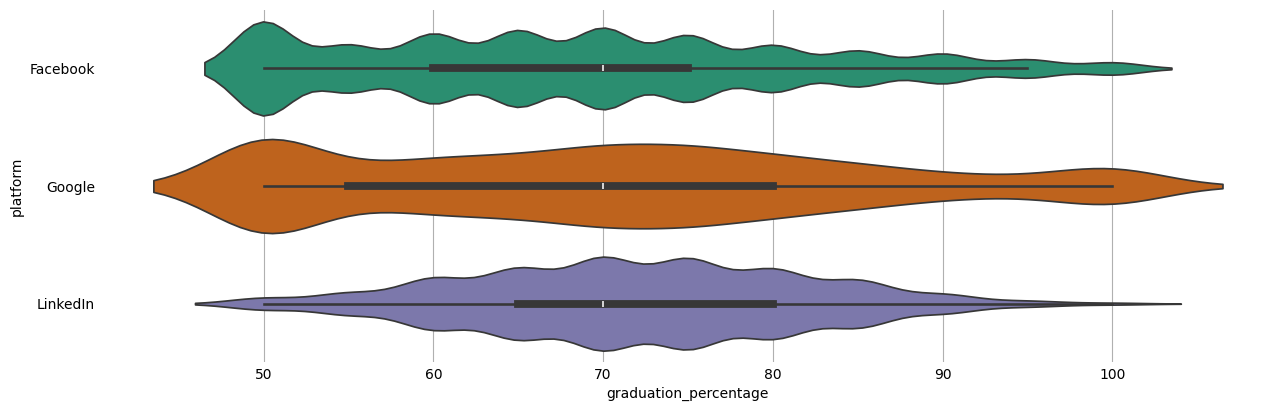

In [7]:
# @title platform vs graduation_percentage

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['platform'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='graduation_percentage', y='platform', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

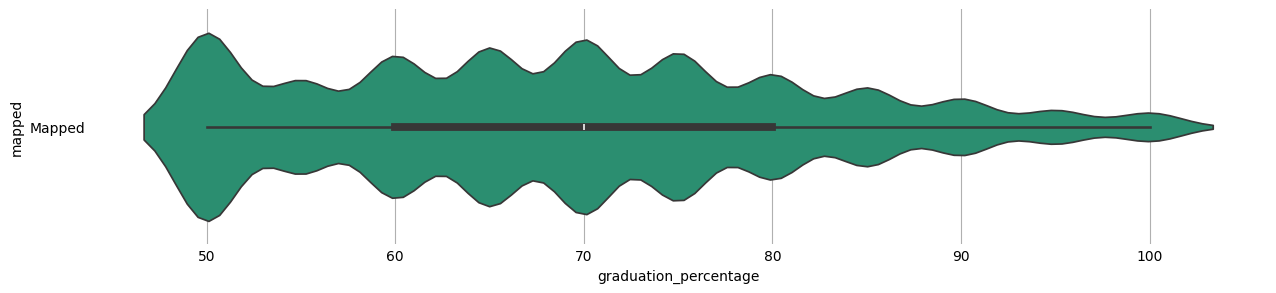

In [6]:
# @title mapped vs graduation_percentage

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['mapped'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='graduation_percentage', y='mapped', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

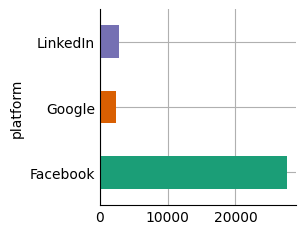

In [5]:
# @title platform

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

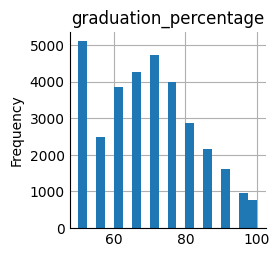

In [4]:
# @title graduation_percentage

from matplotlib import pyplot as plt
df['graduation_percentage'].plot(kind='hist', bins=20, title='graduation_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
data1 = pd.read_excel('/content/Phone Metrics.xlsx')
df1 = pd.DataFrame(data1)
df1

,lead_number,first_name,Lead Id,inbound_phone_call_counter,mobile_number,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,...,status,call_duration_sec,calls_done_by,contacted,call_time,calls_done_by2,new_followup,sales_squad,squad_role,calls_done_by_without_spaces
0,2704878,Pranav,l:861701659054416,NaN,NaN,NaN,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,...,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,SuryanshTiwari,NaN,Squad 3,Agent,SuryanshTiwari
1,2288584,Ramakrishnan,l:966563021758786,NaN,NaN,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,...,NotAnswered,0,DiptikantaJena,NaN,2024-04-17 11:25:00,DiptikantaJena,NaN,Squad 1,TL,DiptikantaJena
2,2721420,Purnima kuppala,l:430457079653387,NaN,NaN,NaN,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,...,Answered,18,JatinLuthra,NaN,2024-04-16 10:49:00,JatinLuthra,NaN,Squad 3,Agent,JatinLuthra
3,693703,Sambit,NaN,NaN,NaN,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,...,Answered,64,ChitwanSoni,NaN,2024-04-17 16:44:00,ChitwanSoni,NaN,Squad 3,Agent,ChitwanSoni
4,2712125,Gokul Krishna,l:1547362259166875,NaN,NaN,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,...,Answered,12,RatneshMishra,NaN,2024-04-16 14:53:00,RatneshMishra,NaN,Squad 1,Agent,RatneshMishra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260618,703645,Shruti Mathur,NaN,0.0,NaN,14.0,Token Amount,14,Ayush Dixit,Outbound Phone Call Activity,...,Answered,123,Muskan,NaN,2024-04-14 12:51:00,Muskan,NaN,NaN,NaN,Muskan
260619,2704878,Pranav,l:861701659054416,3.0,NaN,37.0,Token Amount,1,Ratnesh Mishra,Outbound Phone Call Activity,...,NotAnswered,0,Shashwat,NaN,2024-04-14 12:28:00,Shashwat,NaN,NaN,NaN,Shashwat
260620,2293137,Divya Shukla,l:3609611255969786,0.0,NaN,12.0,Token Amount,10,Ankur chandra,Outbound Phone Call Activity,...,NotAnswered,0,Muskan,NaN,2024-03-27 12:44:00,Muskan,NaN,NaN,NaN,Muskan
260621,2293667,Dev Bhandarker,l:8106492436034710,2.0,NaN,4.0,Counselling Booked,1,Suryansh Tiwari,Inbound Phone Call Activity,...,Missed,0,AviralSharma,NaN,2024-03-04 19:13:00,AviralSharma,NaN,Squad 3,TL,AviralSharma


In [12]:
data2 = pd.read_excel('/content/Candidate Application Tracker.xlsx')
df2 = pd.DataFrame(data2)
df2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 133,Unnamed: 134,i20 Stage,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142
0,S. No.,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Lead Id,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentange,...,Offer Letter Submission Date,,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,
1,1,Vikash,Shailendra Singh,45152,Rutgers,NaN,Rutgers Business School,NaN,NaN,NaN,...,NaN,NaN,True,NaN,Received,14/03/2024,NaN,Defer Fall,NaN,NaN
2,2,Hariraj,Shailendra Singh,45188,Fairfield/DePaul,NaN,DePaul Kellstadt Graduate School of Business,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,On Hold due to CX In Hospital,Defer Fall,NaN,NaN
3,3,Thippesh,Shailendra Singh,45190,Rutgers,NaN,Rutgers Business School,NaN,NaN,NaN,...,NaN,NaN,True,20/02/2024,Received,20/02/2024,NaN,Defer Fall,NaN,NaN
4,4,Chintan,Shailendra Singh,45202,DePaul,NaN,DePaul Kellstadt Graduate School of Business,NaN,NaN,NaN,...,NaN,NaN,True,NaN,Received,28/03/2024,was On Hold due to family issues,Defer Fall (Dropped),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,312,Alladi,Rishabh Tripathi,45397,NaN,NaN,"West Texas A&M University, Paul and Virginia E...",DePaul Kellstadt Graduate School of Business,81.7,90.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2025,NaN,NaN
313,313,Shrishti,Rishabh Tripathi,45397,NaN,l:1347108042669193,"University at Buffalo (SUNY), School of Manage...",Rutgers Business School,91.2,67.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN,NaN
314,314,purnima,Rishabh Tripathi,45397,NaN,l:430457079653387,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2025,NaN,NaN
315,315,ashok,Diptikanta Jena,45397,NaN,l:1441157749822520,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2025,NaN,NaN


In [13]:
data2 = pd.read_excel('/content/Webinar Leads.xlsx')
df2 = pd.DataFrame(data2)
df2

,attended,Leads ID,phone,registration_time,approval_status,join_time,leave_time,time_in_session,is_guest,country_region_name,source_name,original_source,contacted,webinar_date
0,No,NaN,NaN,2024-01-12 12:17:35,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-01-13
1,No,NaN,NaN,2024-01-12 12:17:35,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-01-13
2,No,NaN,NaN,2024-01-12 12:17:35,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-01-13
3,No,NaN,7905033452,2023-11-03 10:18:57,approved,NaT,NaT,0,--,NaN,Linkedin InMail,NaN,NaN,2023-11-18
4,No,NaN,9642484731,2023-11-03 20:40:52,approved,NaT,NaT,0,--,NaN,Linkedin InMail,NaN,NaN,2023-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42779,No,NaN,7077447920,2023-11-06 22:09:55,approved,NaT,NaT,0,--,NaN,Linkedin InMail,NaN,Contacted,2023-11-18
42780,No,l:1107499463603544,'12404372528,2024-01-30 16:39:19,approved,NaT,NaT,0,--,NaN,NaN,NaN,NaN,2024-02-03
42781,No,l:7336513659702987,'17172737475,2024-02-07 23:09:25,approved,NaT,NaT,0,--,NaN,NaN,Zoom Webinar,NaN,2024-02-10
42782,No,l:416116077490963,'919310381911,2024-02-06 21:52:35,approved,NaT,NaT,0,--,NaN,NaN,NaN,Contacted,2024-02-10


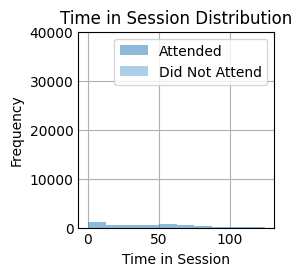

In [31]:
# @title Time in Session Distribution

import matplotlib.pyplot as plt

plt.hist(df2[df2['attended'] == 'Yes']['time_in_session'], alpha=0.5, label='Attended')
plt.hist(df2[df2['attended'] == 'No']['time_in_session'], alpha=0.5, label='Did Not Attend')

plt.xlabel('Time in Session')
plt.ylabel('Frequency')
plt.title('Time in Session Distribution')
_ = plt.legend()

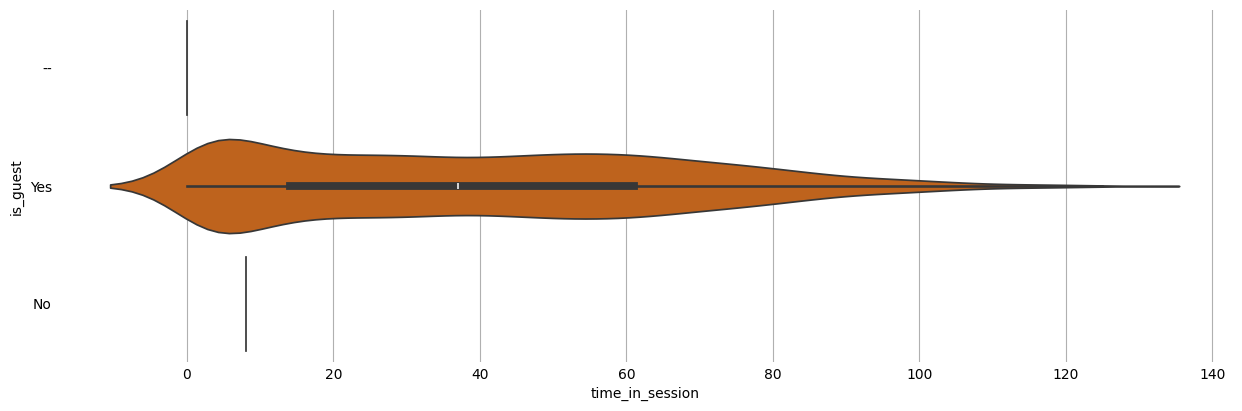

In [30]:
# @title is_guest vs time_in_session

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['is_guest'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='time_in_session', y='is_guest', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Figure size 1200x800 with 0 Axes>

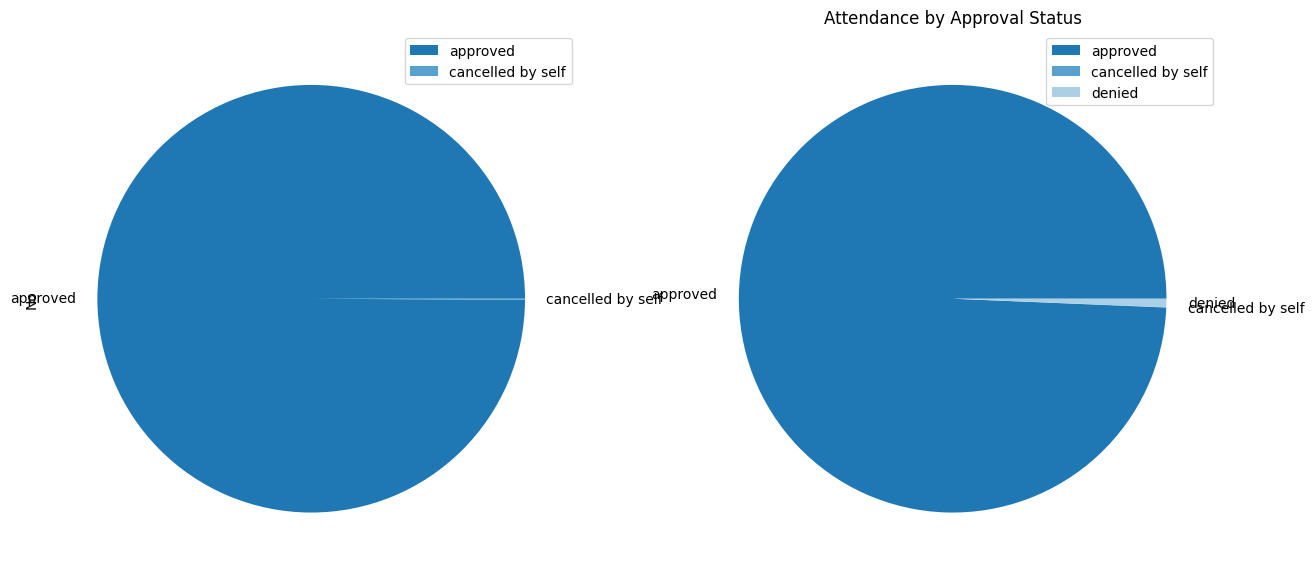

In [42]:
# @title Attendance by Approval Status

# import matplotlib.pyplot as plt

# df2.groupby('approval_status')['attended'].value_counts().unstack().plot(kind='pie', subplots=True)
# plt.ylabel('')
# _ = plt.title('Attendance by Approval Status')
import matplotlib.pyplot as plt

# Change the size of the plot
plt.figure(figsize=(12, 8))  # Change the values to set the desired size

# Group by 'approval_status' and plot the pie charts
df2.groupby('approval_status')['attended'].value_counts().unstack().plot(kind='pie', subplots=True, figsize=(12, 8))

plt.ylabel('')
_ = plt.title('Attendance by Approval Status')

plt.show()


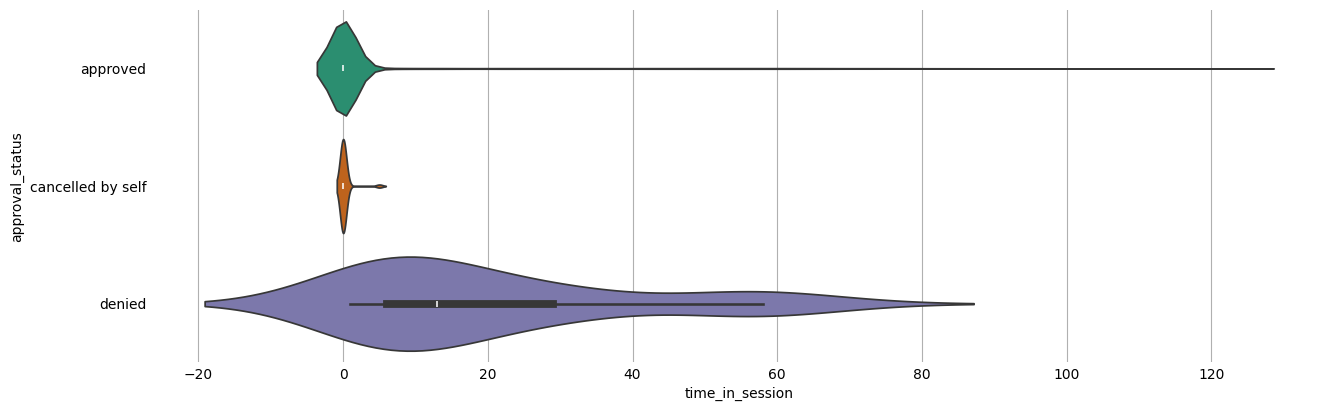

In [28]:
# @title approval_status vs time_in_session

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['approval_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='time_in_session', y='approval_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

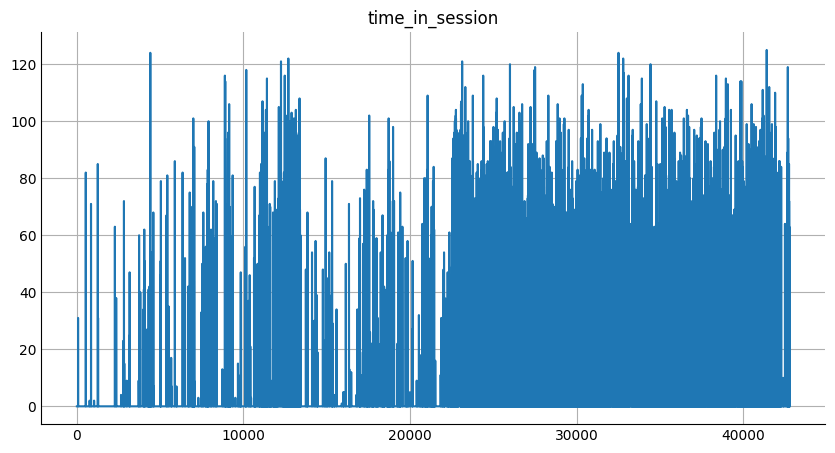

In [27]:
# @title time_in_session

from matplotlib import pyplot as plt
df2['time_in_session'].plot(kind='line', figsize=(8, 4), title='time_in_session')
plt.gca().spines[['top', 'right']].set_visible(False)

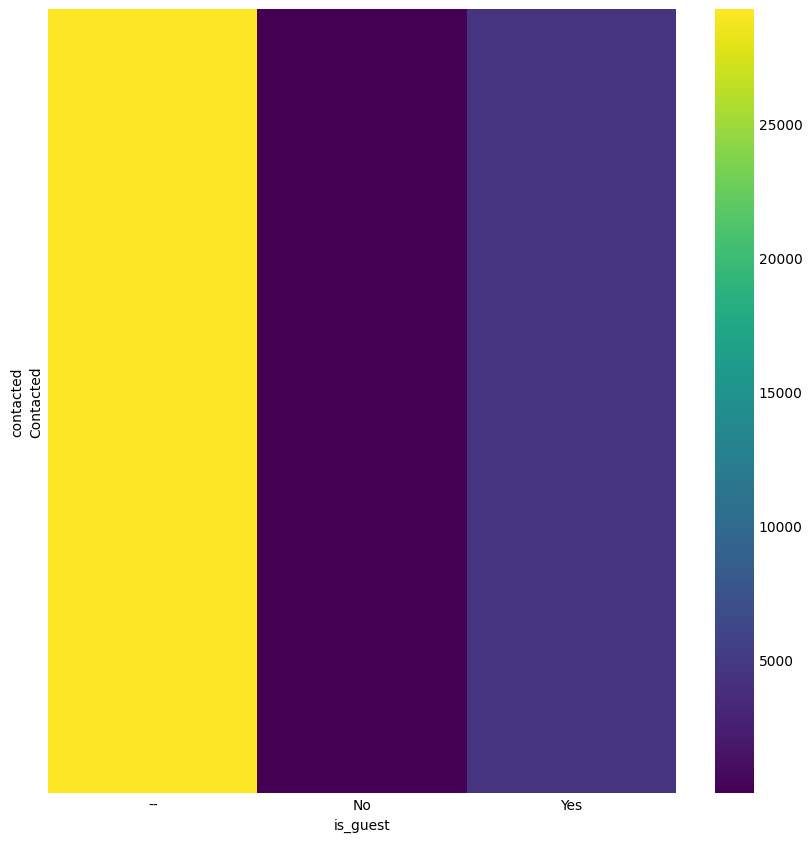

In [26]:
# @title is_guest vs contacted

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['contacted'].value_counts()
    for x_label, grp in df2.groupby('is_guest')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('is_guest')
_ = plt.ylabel('contacted')

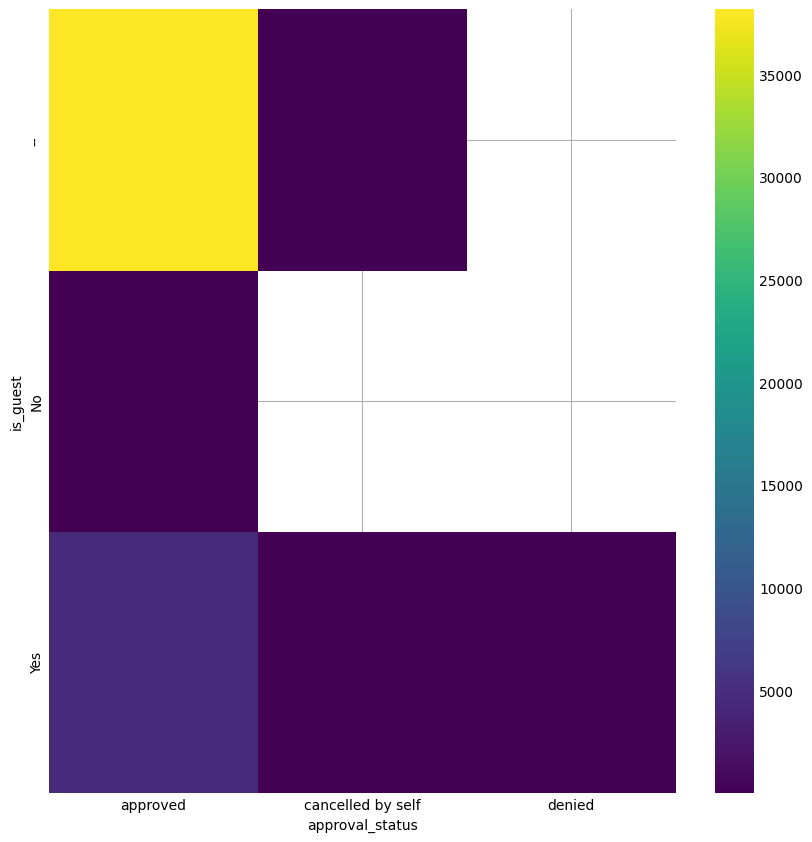

In [25]:
# @title approval_status vs is_guest

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['is_guest'].value_counts()
    for x_label, grp in df2.groupby('approval_status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('approval_status')
_ = plt.ylabel('is_guest')

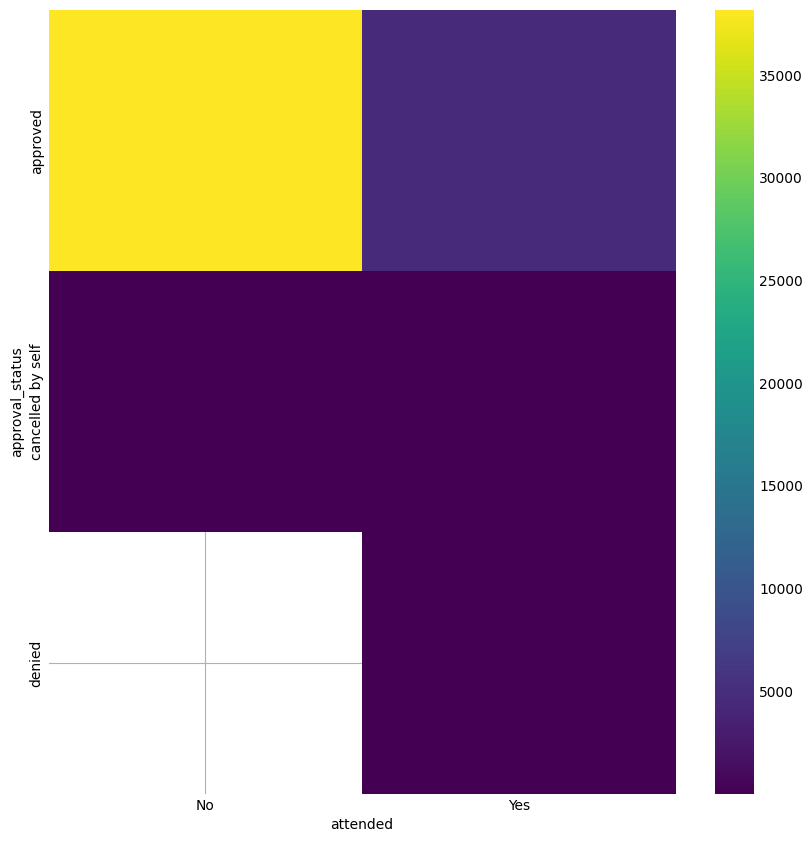

In [24]:
# @title attended vs approval_status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['approval_status'].value_counts()
    for x_label, grp in df2.groupby('attended')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('attended')
_ = plt.ylabel('approval_status')

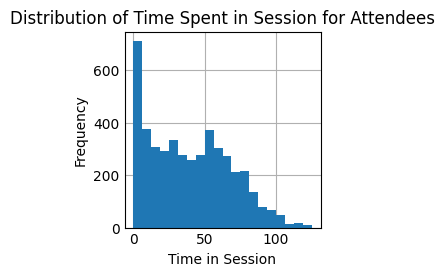

In [23]:
# @title Time in Session Distribution

import matplotlib.pyplot as plt

df2_attended = df2[df2['attended'] == 'Yes']

plt.hist(df2_attended['time_in_session'], bins=20)
plt.xlabel('Time in Session')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Time Spent in Session for Attendees')

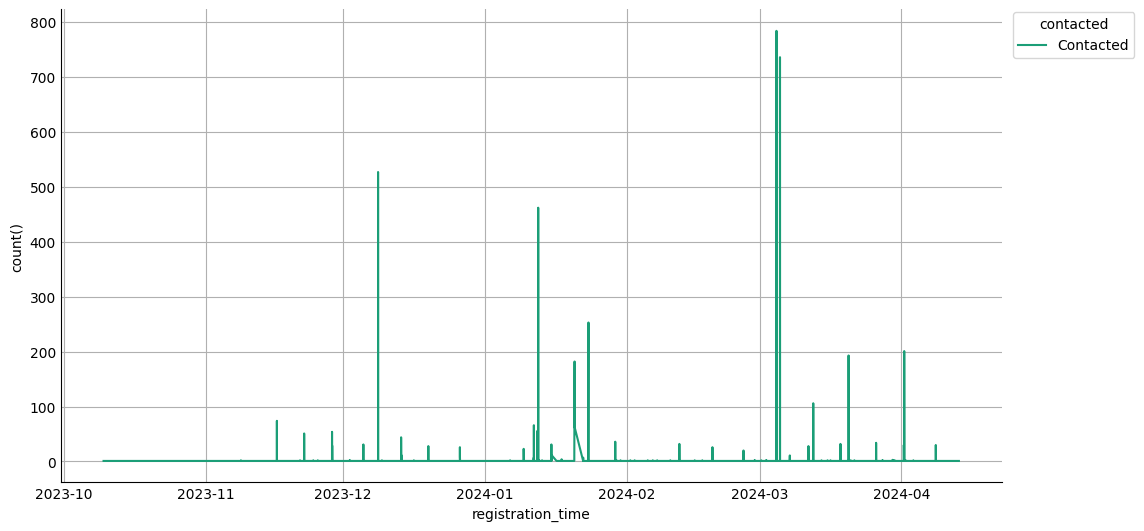

In [22]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('contacted')):
  _plot_series(series, series_name, i)
  fig.legend(title='contacted', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

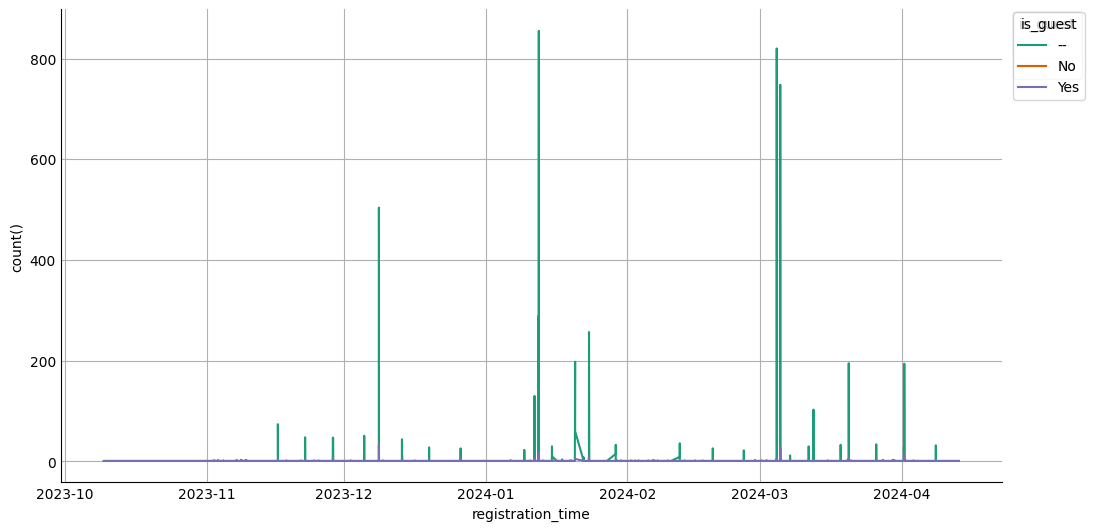

In [21]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('is_guest')):
  _plot_series(series, series_name, i)
  fig.legend(title='is_guest', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

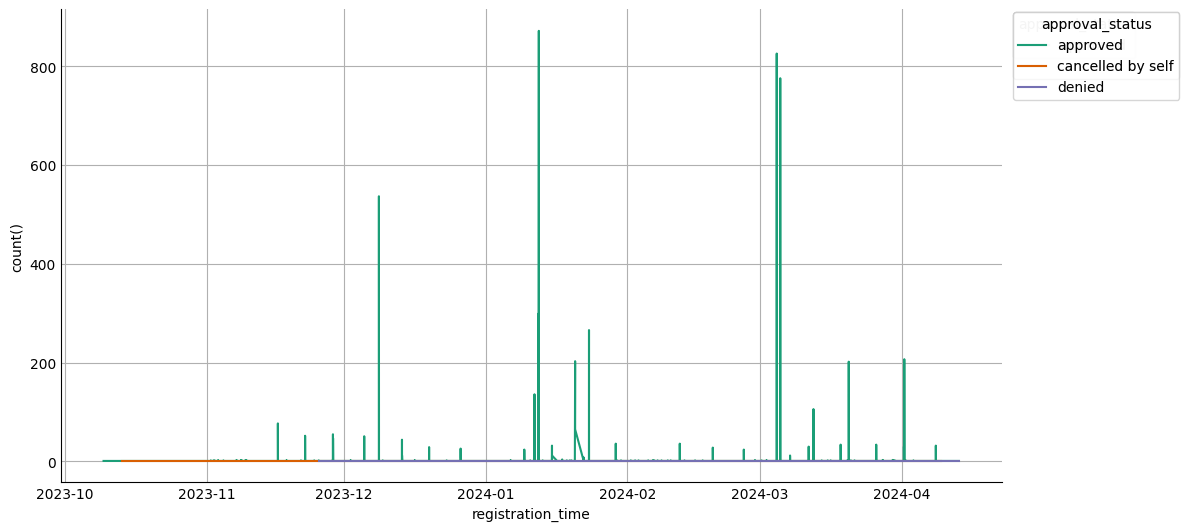

In [20]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('approval_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='approval_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

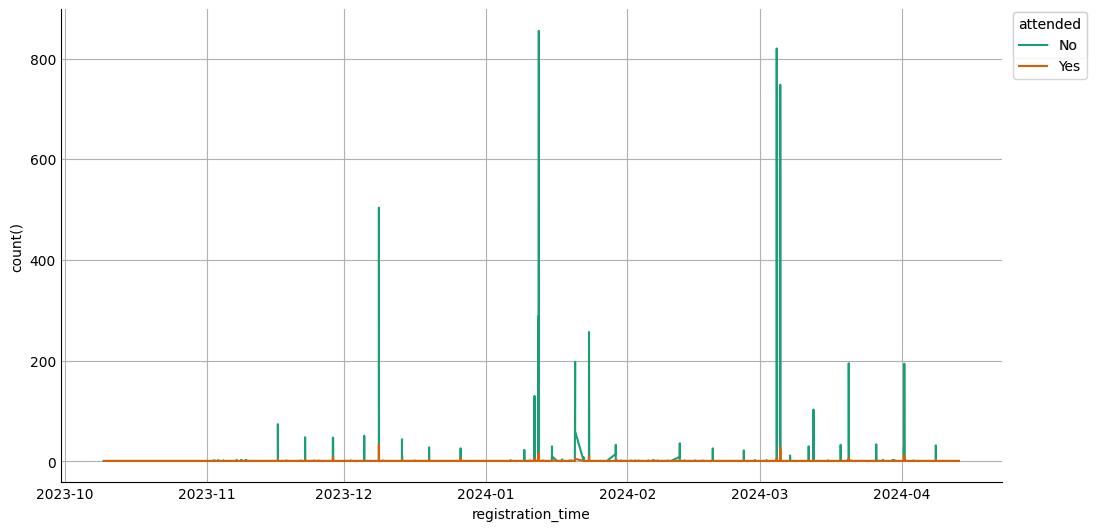

In [19]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('attended')):
  _plot_series(series, series_name, i)
  fig.legend(title='attended', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

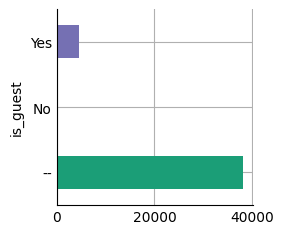

In [18]:
# @title is_guest

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('is_guest').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

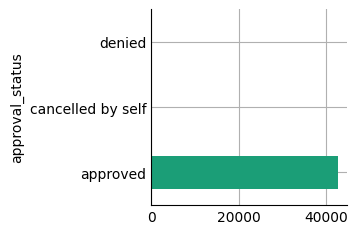

In [17]:
# @title approval_status

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('approval_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

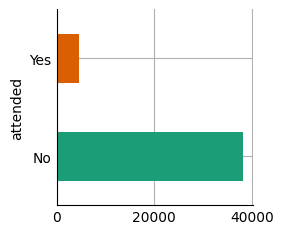

In [16]:
# @title attended

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('attended').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

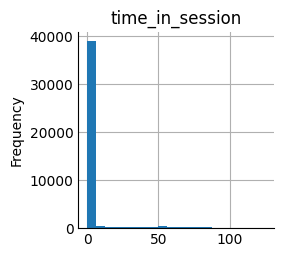

In [15]:
# @title time_in_session

from matplotlib import pyplot as plt
df2['time_in_session'].plot(kind='hist', bins=20, title='time_in_session')
plt.gca().spines[['top', 'right',]].set_visible(False)

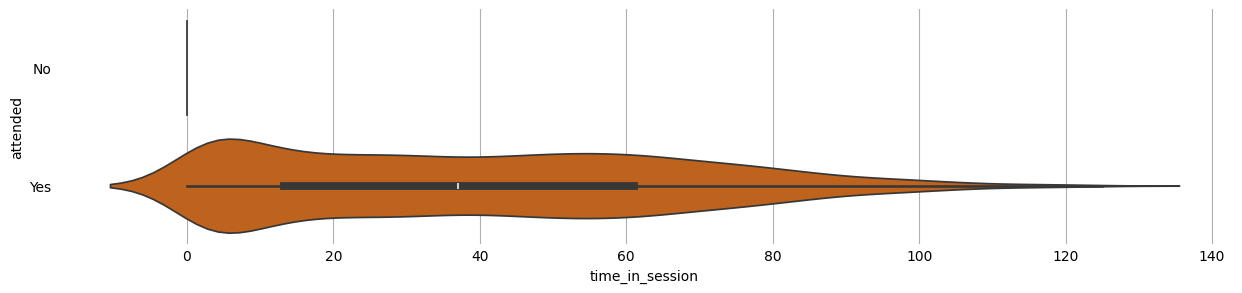

In [14]:
# @title attended vs time_in_session

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['attended'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='time_in_session', y='attended', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [32]:
data3 = pd.read_excel('/content/Tokens Paid.xlsx')
df3 = pd.DataFrame(data3)
df3

,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,upload_timestamp,status
0,Saurabh,NaN,2024-03-01,2024-03-07,Cohort 2,NaN,Sonu Mishra,Rishabh Tripathi,NaN,NaN,ACTIVE TOKEN
1,Sudheer,NaN,2023-08-25,2023-08-30,Cohort 1,LinkedIn,Shaqlain Sheikh,Shailendra singh,d7d7ba30-8207-4a00-a2f0-72c9718a9ad7,NaN,NaN
2,Swathi,NaN,2023-09-19,2023-10-06,Cohort 1,LinkedIn,Rohit,Aarti,9f8bb6d3-d30e-4f73-baa8-8e1ae4dd3517,NaN,NaN
3,Kabir,NaN,2024-03-21,2024-03-23,Cohort 2,Inbound Phone Call,Siddharth Goswami,Aviral Sharma,0acf038e-e696-11ee-807d-02e22ea38447,NaN,ACTIVE TOKEN
4,Vikash,NaN,2023-08-05,2023-08-14,Cohort 1,LinkedIn,Shaqlain Sheikh,zareen,aa13b8b9-cff5-41fe-a1f5-353e4c90ab04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
262,Ashok,l:1441157749822520,2024-04-10,2024-04-15,Cohort 2,Facebook,Bompada Sai Sudeep,Diptikanta Jena,6f4c7f29-9243-4a06-87af-b8f87be0b04f,NaN,ACTIVE TOKEN
263,Plabini,l:733737222271914,2024-04-09,2024-04-14,Cohort 2,Zoom Webinar,Ratnesh Mishra,Rishabh Tripathi,4199597c-341d-4cf4-8823-2fe391dcbfc6,NaN,ACTIVE TOKEN
264,Pranav,l:861701659054416,2024-03-30,2024-04-14,Cohort 2,Zoom Webinar,Ratnesh Mishra,Shashwat,0181dce5-7a90-4d3f-b832-aee660d2aeb5,NaN,ACTIVE TOKEN
265,Gokul,l:1547362259166875,2024-04-04,2024-04-14,Cohort 2,Zoom Webinar,Simran Singh,Rishabh Tripathi,63875ab3-7318-4fb2-a87a-52ab2594bfed,NaN,ACTIVE TOKEN


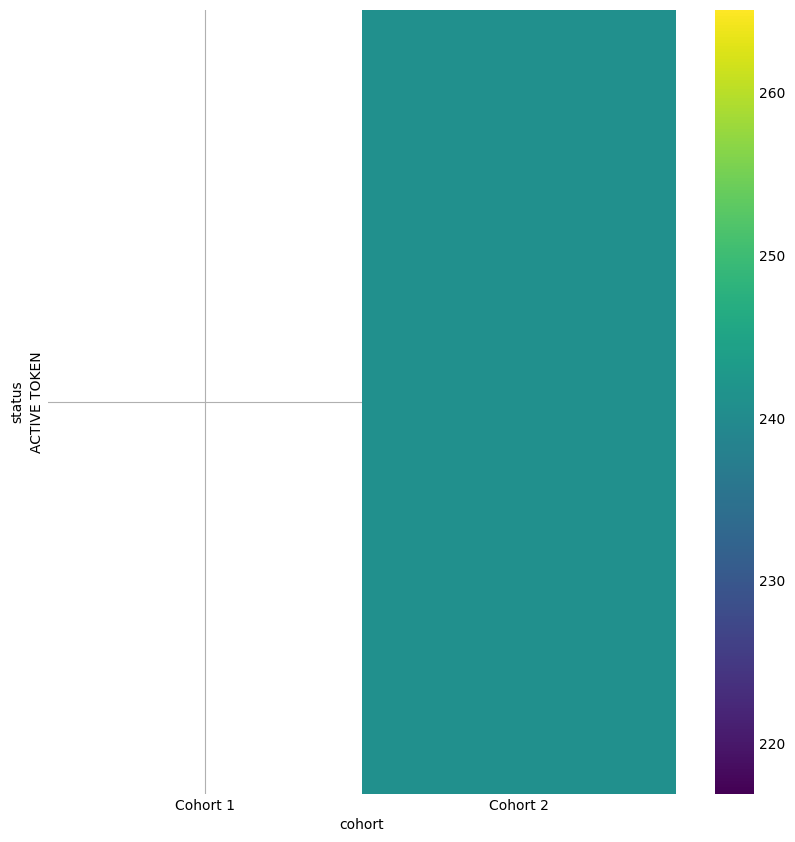

In [38]:
# @title cohort vs status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['status'].value_counts()
    for x_label, grp in df3.groupby('cohort')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cohort')
_ = plt.ylabel('status')

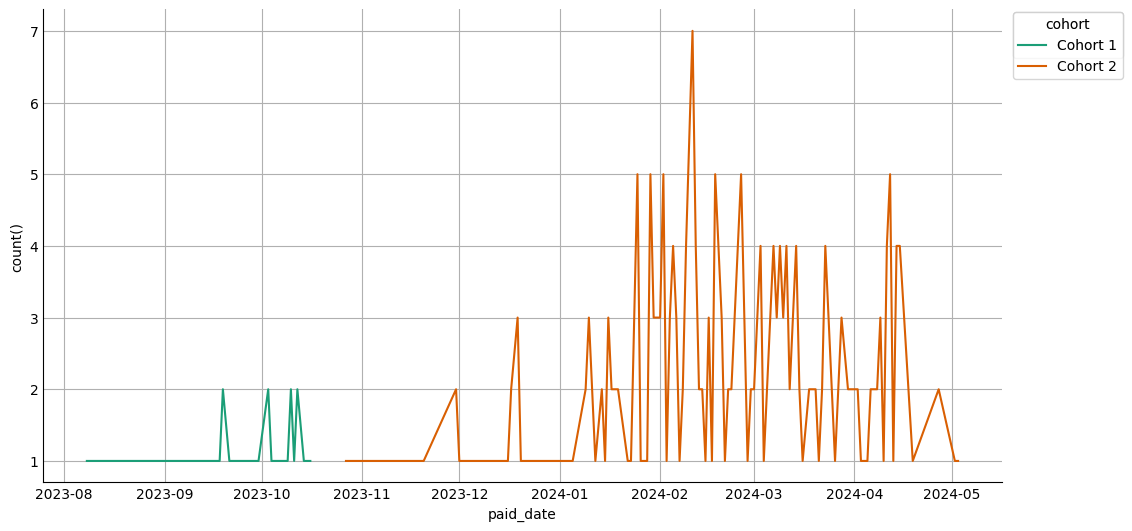

In [37]:
# @title paid_date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['paid_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'paid_date'}, axis=1)
              .sort_values('paid_date', ascending=True))
  xs = counted['paid_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('paid_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cohort')):
  _plot_series(series, series_name, i)
  fig.legend(title='cohort', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('paid_date')
_ = plt.ylabel('count()')

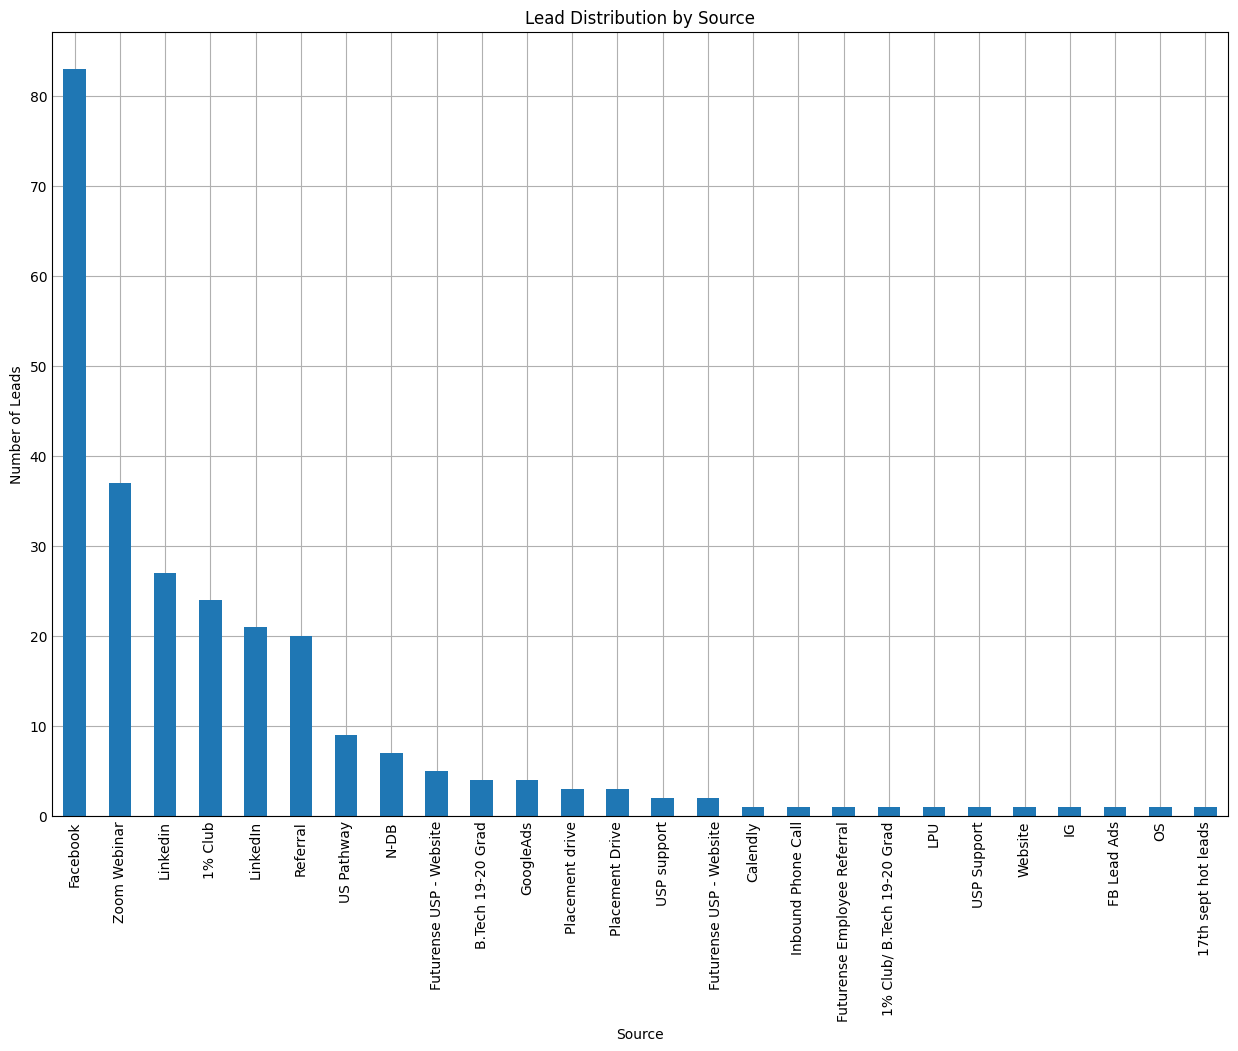

In [44]:
# @title Lead Distribution by Source

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

df3['source'].value_counts().plot(kind='bar',figsize=(12, 8) )
plt.xlabel('Source')
plt.ylabel('Number of Leads')
_ = plt.title('Lead Distribution by Source')
plt.show()

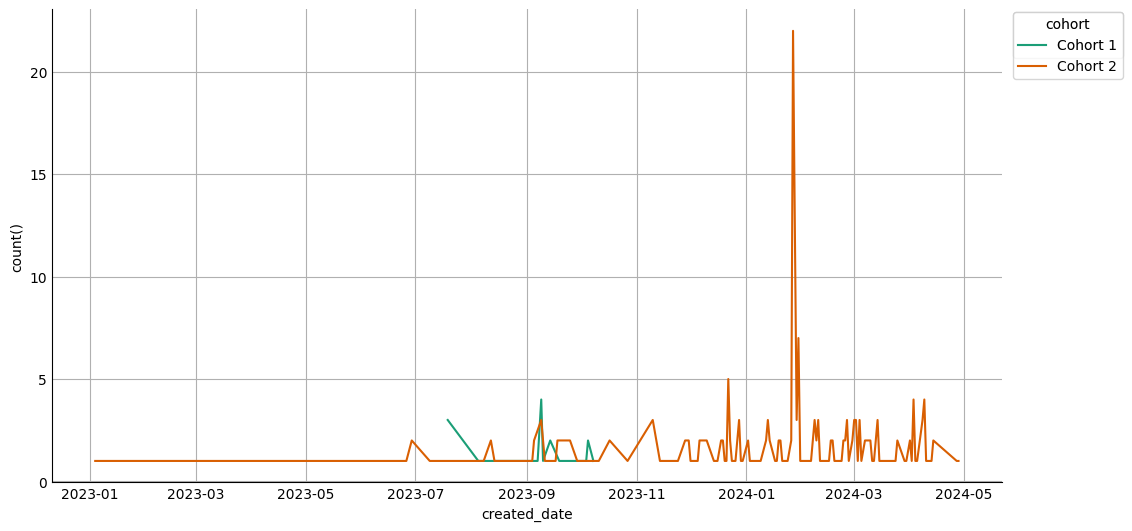

In [35]:
# @title created_date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['created_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'created_date'}, axis=1)
              .sort_values('created_date', ascending=True))
  xs = counted['created_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('created_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cohort')):
  _plot_series(series, series_name, i)
  fig.legend(title='cohort', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('created_date')
_ = plt.ylabel('count()')

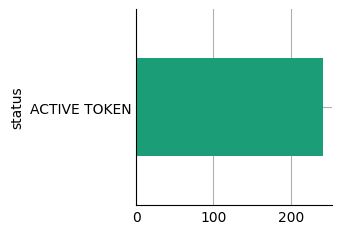

In [34]:
# @title status

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

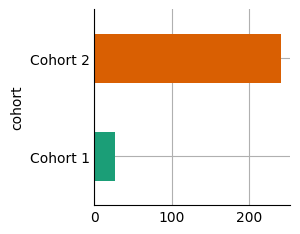

In [33]:
# @title cohort

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('cohort').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
data4 = pd.read_excel('/content/campaign_performance.xlsx')
df4 = pd.DataFrame(data4)
df4

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,NaT,--,6766.15,1250,220,0.176000,25.0,Google,GMAT/GRE
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424
...,...,...,...,...,...,...,...,...,...,...,...
28529,2024-03-12,USP_MS + Coop Campaign_240224,NaT,USP_RG_VideoAd5,67.18,268,1,0.373134,0.0,Facebook,MS + Coop KA&TN Ad set - 240224
28530,2024-03-12,USP_MS + Coop Campaign_240224,NaT,USP_RG_VideoAd5,50.65,75,1,1.333333,0.0,Facebook,MS + Coop All India Ad set - 240224
28531,2024-03-12,USP Study Abroad_Generic_240224,NaT,USP_Webinar_Saturdayfuture - Copy,11.34,28,0,0.000000,0.0,Facebook,AP&TS Generic Leads Ad Set_240224
28532,2024-03-12,USP Study Abroad_Generic_240224,NaT,USP_Webinar_Saturdayfuture - Copy,136.97,134,0,0.000000,0.0,Facebook,KA&TN Generic Leads Ad Set_240224


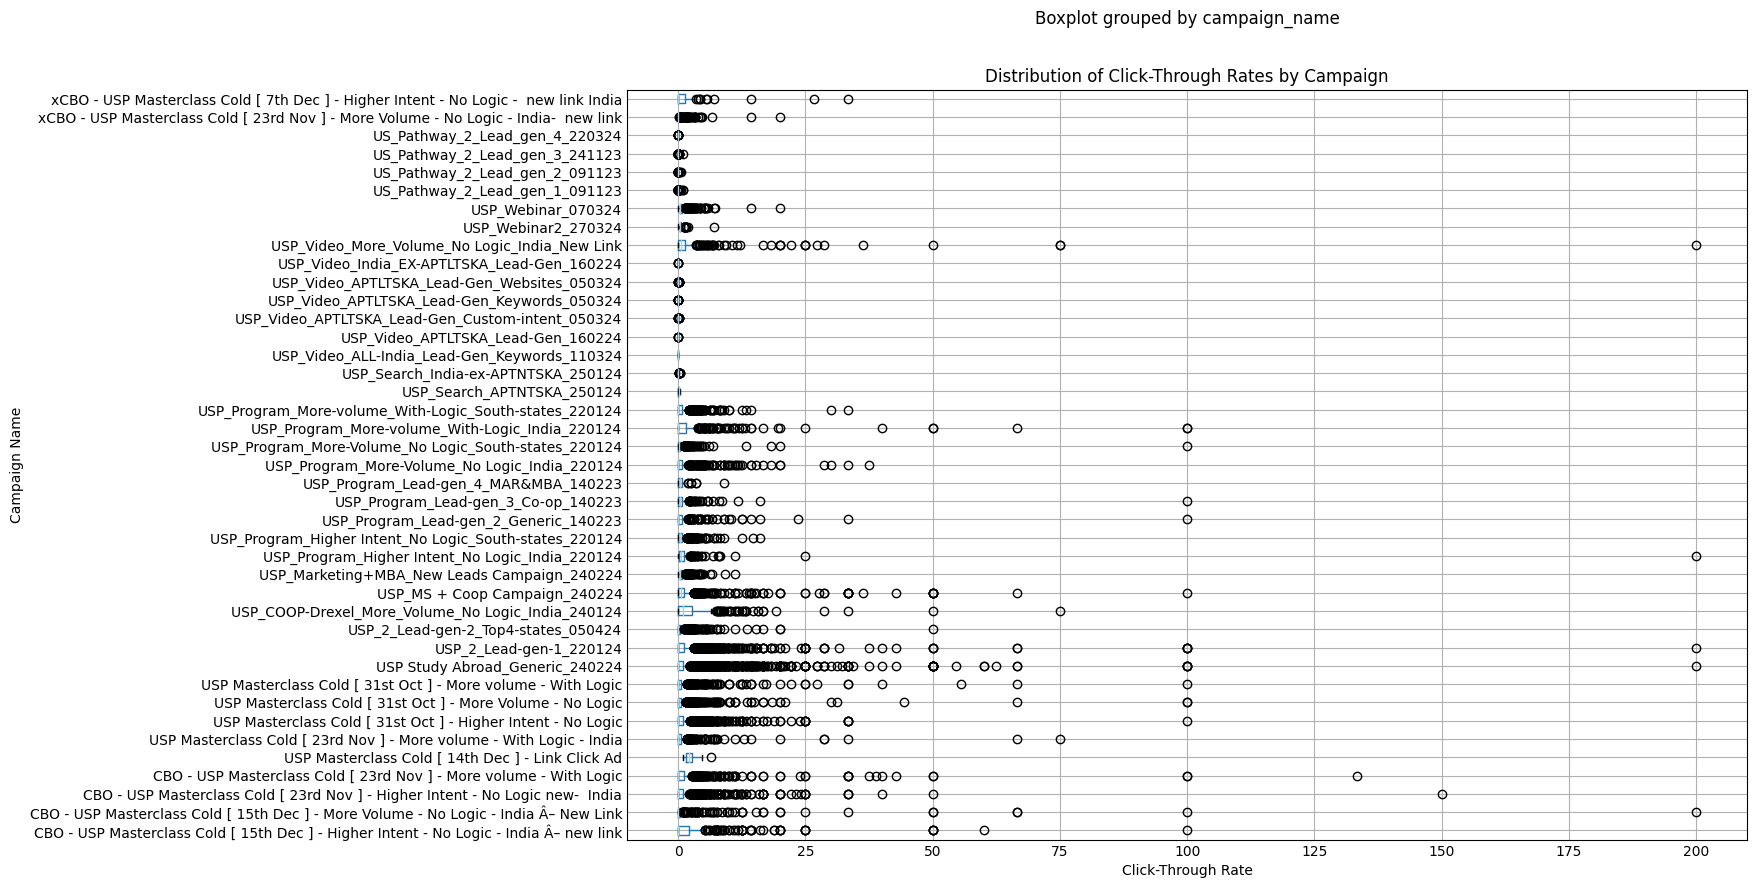

In [47]:
# @title Distribution of Click-Through Rates by Campaign

import matplotlib.pyplot as plt

df4.boxplot(column='click_through_rate', by='campaign_name', vert=False, figsize=(14, 10))
plt.xlabel('Click-Through Rate')
plt.ylabel('Campaign Name')
_ = plt.title('Distribution of Click-Through Rates by Campaign')